<a href="https://colab.research.google.com/github/Indrateja25/TensorFlow/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4803 - acc: 0.8293
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3625 - acc: 0.8689
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3240 - acc: 0.8810
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sampl

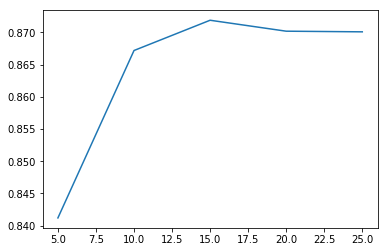

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

#1.Load Data
download_data = keras.datasets.fashion_mnist
data = download_data.load_data()
#print(download_data)
#print(dir(download_data))
#print(data[0],data[1])


#2.Observe and look into Data
#print(len(data))  #Len , Size, Shape  

train_data = data[0]
test_data = data[1]

xtrain = train_data[0]
ytrain = train_data[1]
xtest = test_data[0]
ytest = test_data[1]


#print(xtrain.shape,ytrain.shape)
#print(xtrain[0].shape)

#2.1 plot an image
#plt.figure()  #figsize = (5,5)
#plt.imshow(xtrain[0]) #, cmap=plt.cm.binary) 
#plt.colorbar()
#print(ytrain[0])

#2.2 Declared classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#3.FeatureScaling feature engineering
xtrain = xtrain/255 #feature_scaling: Max-scaling


#4.Creating the Model
#add layers
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(256,activation = tf.nn.relu)) #layer outputs
model.add(keras.layers.Dense(10,activation = 'softmax'))

#compile it
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy']) 
print(model.summary()) #get summary of the model

epo = []
accuracy = []
for  i in range(5,30,5):
  model.fit(xtrain, ytrain, epochs = i)#, batch_size=10, validation_split=0.2)
  test_loss, test_acc = model.evaluate(xtest, ytest)
  accuracy.append(test_acc)
  epo.append(i)

plt.plot(epo,accuracy)
plt.show()

#model.predict
#model.save